# **Metodo de biseccion**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


xl_lista = []
xu_lista = []
xr_lista = []
fxl_lista = []
fxu_lista = []
fxr_lista = []

xl = int(input("Introduzca el limite inferior"))
xu = int(input("Introduzca el limite superior"))
cont = 1
error = 1
errores = []
ecuacion = input("Introduce la ecuación en x (ej: 3*x**2-120*x+100): ")
errores.append(error)
def f(x):
  return eval(ecuacion)
xr_anterior = 0  # inicialización

while error > 1e-10:
    xr = (xl+xu)/2

    # Guardar valores ANTES de actualizar xl y xu
    xl_lista.append(xl)
    xu_lista.append(xu)
    xr_lista.append(xr)
    fxl_lista.append(f(xl))
    fxu_lista.append(f(xu))
    fxr_lista.append(f(xr))


    if cont > 1:
        error = abs((xr - xr_anterior) / xr)
        errores.append(error)

    # Actualización del intervalo
    if f(xl) * f(xr) < 0:
        xu = xr
    else:
        xl = xr

    xr_anterior = xr
    cont += 1

df = pd.DataFrame({
    "xl": xl_lista,
    "xu": xu_lista,
    "xr": xr_lista,
    "error": errores,
    "F(xl)" : fxl_lista,
    "F(xu)" : fxu_lista,
    "F(xr)": fxr_lista,
})


x_min = xl_lista[0] - abs(xu_lista[0] - xl_lista[0]) * 5
x_max = xu_lista[0] + abs(xu_lista[0] - xl_lista[0]) * 5

x_vals = np.linspace(x_min, x_max, 800)
y_vals = [f(x) for x in x_vals]

plt.figure(figsize=(8,5))
plt.axhline(0, color="black", linewidth=1)  # eje X
plt.plot(x_vals, y_vals, label=f"f(x) = {ecuacion}", color="blue")
plt.title("Gráfico de la función (zoom out)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


df['error'].plot(kind='line', figsize=(8, 4), title='error')
plt.gca().spines[['top', 'right']].set_visible(False)
df


# **Metodo de falsa posicion**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


xl_lista = []
xu_lista = []
xr_lista = []
fxl_lista = []
fxu_lista = []
fxr_lista = []

xl = int(input("Introduzca el limite inferior"))
xu = int(input("Introduzca el limite superior"))
cont = 1
error = 1
errores = []
ecuacion = input("Introduce la ecuación en x (ej: 3*x**2-120*x+100): ")
errores.append(error)
def f(x):
  return eval(ecuacion)
xr_anterior = 0  # inicialización

while error > 1e-10:
    xr = xu - ((f(xu)*(xl-xu))/(f(xl)-f(xu)))

    # Guardar valores ANTES de actualizar xl y xu
    xl_lista.append(xl)
    xu_lista.append(xu)
    xr_lista.append(xr)
    fxl_lista.append(f(xl))
    fxu_lista.append(f(xu))
    fxr_lista.append(f(xr))


    if cont > 1:
        error = abs((xr - xr_anterior) / xr)
        errores.append(error)

    # Actualización del intervalo
    if f(xl) * f(xr) < 0:
        xu = xr
    else:
        xl = xr

    xr_anterior = xr
    cont += 1

df = pd.DataFrame({
    "xl": xl_lista,
    "xu": xu_lista,
    "xr": xr_lista,
    "error": errores,
    "F(xl)" : fxl_lista,
    "F(xu)" : fxu_lista,
    "F(xr)": fxr_lista,
})


x_min = xl_lista[0] - abs(xu_lista[0] - xl_lista[0]) * 5
x_max = xu_lista[0] + abs(xu_lista[0] - xl_lista[0]) * 5

x_vals = np.linspace(x_min, x_max, 100)
y_vals = [f(x) for x in x_vals]

plt.figure(figsize=(8,5))
plt.axhline(0, color="black", linewidth=1)  # eje X
plt.plot(x_vals, y_vals, label=f"f(x) = {ecuacion}", color="blue")
plt.title("Gráfico de la función (zoom out)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


df['error'].plot(kind='line', figsize=(8, 4), title='error')
plt.gca().spines[['top', 'right']].set_visible(False)
df


# **Funcion dorada**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- Widgets ---
dropdown = widgets.Dropdown(
    options=['Máximo', 'Mínimo'],
    value='Máximo',
    description='Buscar:',
)

ecuacion_input = widgets.Text(
    value='-(x**2)+4*x+10',
    description='Ecuación:',
)

xl_input = widgets.FloatText(
    value=0,
    description='xl:',
)

xu_input = widgets.FloatText(
    value=5,
    description='xu:',
)

boton = widgets.Button(
    description='Confirmar',
    button_style='success'
)

# --- Función principal ---
def razon_dorada(ecuacion, xl, xu, modo):
    # Listas para guardar resultados
    xl_lista, xu_lista = [], []
    x1_lista, x2_lista = [], []
    fxl_lista, fxu_lista, fx1_lista, fx2_lista = [], [], [], []
    errores = []

    phi = (1 + math.sqrt(5)) / 2
    d = (1/phi) * (xu - xl)
    x1 = xl + d
    x2 = xu - d
    cont = 1
    error = 1

    # Definir función
    def f(x):
        return eval(ecuacion)

    while error > 1e-8:
        # Guardar valores
        xl_lista.append(xl)
        xu_lista.append(xu)
        x1_lista.append(x1)
        x2_lista.append(x2)
        fxl_lista.append(f(xl))
        fxu_lista.append(f(xu))
        fx1_lista.append(f(x1))
        fx2_lista.append(f(x2))

        if cont > 1:
            error = abs(xu - xl)
            errores.append(error)

        # Actualización del intervalo
        if modo == "Máximo":
            if f(x2) > f(x1):
                xu = x1
                x1 = x2
                d = (1/phi) * (xu - xl)
                x2 = xl + d
            else:
                xl = x2
                x2 = x1
                d = (1/phi) * (xu - xl)
                x1 = xu - d
        else:  # Mínimo
            if f(x2) < f(x1):
                xu = x1
                x1 = x2
                d = (1/phi) * (xu - xl)
                x2 = xl + d
            else:
                xl = x2
                x2 = x1
                d = (1/phi) * (xu - xl)
                x1 = xu - d

        cont += 1

    # --- Crear DataFrame ---
    df = pd.DataFrame({
        "xl": xl_lista,
        "xu": xu_lista,
        "x1": x1_lista,
        "x2": x2_lista,
        "error": errores + [None],  # para cuadrar longitudes
        "F(xl)": fxl_lista,
        "F(xu)": fxu_lista,
        "F(x1)": fx1_lista,
        "F(x2)": fx2_lista
    })

    x_min = xl_lista[0] - abs(xu_lista[0] - xl_lista[0]) * 1.5
    x_max = xu_lista[0] + abs(xu_lista[0] - xl_lista[0]) * 1.5

    x_vals = np.linspace(x_min, x_max, 800)
    y_vals = [f(x) for x in x_vals]

    plt.figure(figsize=(8,5))
    plt.axhline(0, color="black", linewidth=1)
    plt.plot(x_vals, y_vals, label=f"f(x) = {ecuacion}", color="blue")
    plt.title(f"Gráfico de la función buscando el {modo}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Graficar el error ---
    df['error'].plot(kind='line', figsize=(8, 4), title='Error por iteración')
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()

    return df


def on_button_click(b):
    clear_output()  # limpia pantalla al confirmar
    display(dropdown, ecuacion_input, xl_input, xu_input, boton)  # volver a mostrar widgets
    ecuacion = ecuacion_input.value
    xl = xl_input.value
    xu = xu_input.value
    modo = dropdown.value
    print(f"Ejecutando búsqueda de {modo} para f(x) = {ecuacion}")
    df = razon_dorada(ecuacion, xl, xu, modo)
    display(df)

boton.on_click(on_button_click)

display(dropdown, ecuacion_input, xl_input, xu_input, boton)


# **Interpolación cuadrática**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- Widgets ---
dropdown = widgets.Dropdown(
    options=['Máximo', 'Mínimo'],
    value='Máximo',
    description='Buscar:',
)

ecuacion_input = widgets.Text(
    value='2*np.sin(x) - (x**2)/10',
    description='Ecuación:',
)

x0_input = widgets.FloatText(
    value=0,
    description='x0:',
)

x1_input = widgets.FloatText(
    value=1,
    description='x1:',
)

x2_input = widgets.FloatText(
    value=4,
    description='x2:',
)

boton = widgets.Button(
    description='Confirmar',
    button_style='success'
)

# --- Función auxiliar ---
def x3_formula(f, x0, x1, x2):
    f0, f1, f2 = f(x0), f(x1), f(x2)

    numerator = (
        f0 * (x1**2 - x2**2) +
        f1 * (x2**2 - x0**2) +
        f2 * (x0**2 - x1**2)
    )

    denominator = (
        2 * f0 * (x1 - x2) +
        2 * f1 * (x2 - x0) +
        2 * f2 * (x0 - x1)
    )

    if denominator == 0:
        raise ZeroDivisionError("El denominador es cero, no se puede calcular x3.")

    return numerator / denominator

# --- Método de interpolación cuadrática ---
def interpolacion_cuadratica(ecuacion, x0, x1, x2, modo):
    # Listas para guardar resultados
    x0_lista, x1_lista, x2_lista, x3_lista = [], [], [], []
    fx0_lista, fx1_lista, fx2_lista, fx3_lista = [], [], [], []
    errores = []

    # Definir función
    def f(x):
        return eval(ecuacion)

    cont = 1
    error = 1

    while error > 1e-8 and cont < 50:  # límite de 50 iteraciones
        # Calcular x3
        x3 = x3_formula(f, x0, x1, x2)

        # Guardar resultados
        x0_lista.append(x0)
        x1_lista.append(x1)
        x2_lista.append(x2)
        x3_lista.append(x3)

        fx0_lista.append(f(x0))
        fx1_lista.append(f(x1))
        fx2_lista.append(f(x2))
        fx3_lista.append(f(x3))

        if cont > 1:
            error = abs(x3_lista[-1] - x3_lista[-2])
            errores.append(error)
        else:
            errores.append(None)

        # ============================
        # Lógica de comparación
        # ============================
        if modo == "Máximo":
            if f(x3) > f(x1):
                if x3 > x1:
                    x0 = x1
                    x1 = x3
                else:
                    x2 = x1
                    x1 = x3
        else:  # Mínimo
            if f(x3) < f(x1):
                if x3 > x1:
                    x0 = x1
                    x1 = x3
                else:
                    x2 = x1
                    x1 = x3

        cont += 1

    # --- Crear DataFrame ---
    df = pd.DataFrame({
        "x0": x0_lista,
        "x1": x1_lista,
        "x2": x2_lista,
        "x3": x3_lista,
        "error": errores,
        "F(x0)": fx0_lista,
        "F(x1)": fx1_lista,
        "F(x2)": fx2_lista,
        "F(x3)": fx3_lista
    })

    # --- Graficar la función ---
    x_min = min(x0_lista[0], x2_lista[0]) - 1
    x_max = max(x0_lista[0], x2_lista[0]) + 1

    x_vals = np.linspace(x_min, x_max, 800)
    y_vals = [f(x) for x in x_vals]

    plt.figure(figsize=(8,5))
    plt.axhline(0, color="black", linewidth=1)
    plt.plot(x_vals, y_vals, label=f"f(x) = {ecuacion}", color="blue")
    plt.scatter(x3_lista, fx3_lista, color="red", marker="x", label="Iteraciones")
    plt.title(f"Interpolación cuadrática buscando el {modo}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Graficar el error ---
    df['error'].plot(kind='line', figsize=(8, 4), title='Error por iteración')
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()

    return df

# --- Acción al presionar el botón ---
def on_button_click(b):
    clear_output()  # limpia pantalla al confirmar
    display(dropdown, ecuacion_input, x0_input, x1_input, x2_input, boton)  # volver a mostrar widgets
    ecuacion = ecuacion_input.value
    x0 = x0_input.value
    x1 = x1_input.value
    x2 = x2_input.value
    modo = dropdown.value
    print(f"Ejecutando búsqueda de {modo} para f(x) = {ecuacion}")
    df = interpolacion_cuadratica(ecuacion, x0, x1, x2, modo)
    display(df)

boton.on_click(on_button_click)

# --- Mostrar interfaz ---
display(dropdown, ecuacion_input, x0_input, x1_input, x2_input, boton)


Dropdown(description='Buscar:', options=('Máximo', 'Mínimo'), value='Máximo')

Text(value='2*np.sin(x) - (x**2)/10', description='Ecuación:')

FloatText(value=0.0, description='x0:')

FloatText(value=1.0, description='x1:')

FloatText(value=4.0, description='x2:')

Button(button_style='success', description='Confirmar', style=ButtonStyle())

# **Método de Newton**

Dropdown(description='Buscar:', index=1, options=('Máximo', 'Mínimo'), value='Mínimo')

Text(value='2*sp.sin(x) - (x**2)/10', description='Ecuación:')

FloatText(value=-1.0, description='x0:')

Button(button_style='success', description='Confirmar', style=ButtonStyle())

Ejecutando búsqueda de Mínimo para f(x) = 2*sp.sin(x) - (x**2)/10


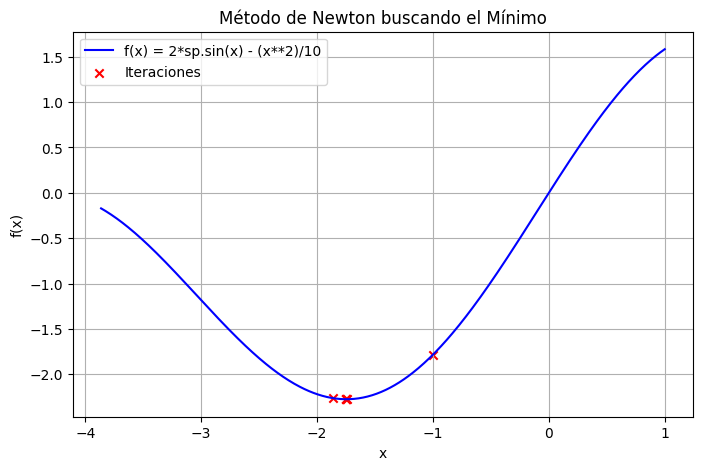

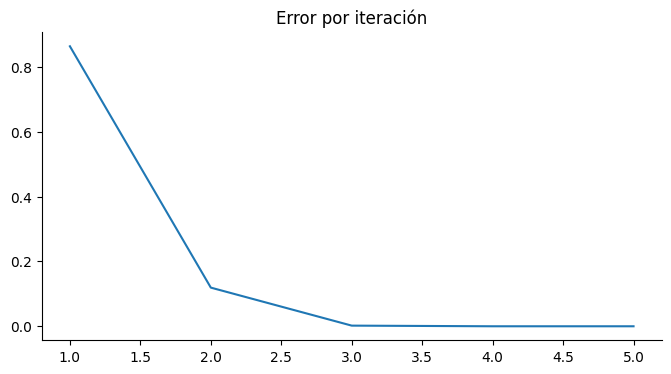

Óptimo encontrado en x = -1.7463292822528529 con f(x) = -2.274233810556402
Según f''(x), el punto es un: Mínimo


,x,f(x),error
0,-1.000000,-1.782942,NaN
1,-1.863557,-2.262186,8.635568e-01
2,-1.744319,-2.274230,1.192379e-01
3,-1.746329,-2.274234,2.010008e-03
4,-1.746329,-2.274234,3.957611e-07
5,-1.746329,-2.274234,1.554312e-14


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- Widgets ---
dropdown = widgets.Dropdown(
    options=['Máximo', 'Mínimo'],
    value='Máximo',
    description='Buscar:',
)

ecuacion_input = widgets.Text(
    value='2*sp.sin(x) - (x**2)/10',
    description='Ecuación:',
)

x0_input = widgets.FloatText(
    value=2.5,
    description='x0:',
)

boton = widgets.Button(
    description='Confirmar',
    button_style='success'
)

# --- Método de Newton para optimización ---
def newton_optimizacion(ecuacion, x0, modo):
    # Variable simbólica
    x = sp.symbols('x')
    f = eval(ecuacion)   # función simbólica
    f1 = sp.diff(f, x)   # primera derivada
    f2 = sp.diff(f, x, 2) # segunda derivada

    # Listas para guardar resultados
    x_lista, fx_lista, error_lista = [], [], []

    xi = x0
    tol = 1e-8
    max_iter = 50
    error = 1
    cont = 0

    while error > tol and cont < max_iter:
        # Evaluar función y derivadas en el punto actual
        fxi = float(f.subs(x, xi))
        f1xi = float(f1.subs(x, xi))
        f2xi = float(f2.subs(x, xi))

        # Guardar valores
        x_lista.append(xi)
        fx_lista.append(fxi)
        if cont == 0:
            error_lista.append(None)
        else:
            error = abs(xi - x_lista[-2])
            error_lista.append(error)

        # Fórmula de Newton
        if f2xi == 0:
            print("La segunda derivada es cero. No se puede continuar.")
            break
        xi = xi - f1xi / f2xi
        cont += 1

    # --- Crear DataFrame ---
    df = pd.DataFrame({
        "x": x_lista,
        "f(x)": fx_lista,
        "error": error_lista
    })

    # --- Graficar función ---
    x_min = min(x_lista) - 2
    x_max = max(x_lista) + 2
    x_vals = np.linspace(x_min, x_max, 500)
    f_lambda = sp.lambdify(x, f, "numpy")
    y_vals = f_lambda(x_vals)

    plt.figure(figsize=(8,5))
    plt.plot(x_vals, y_vals, label=f"f(x) = {ecuacion}", color="blue")
    plt.scatter(x_lista, fx_lista, color="red", marker="x", label="Iteraciones")
    plt.title(f"Método de Newton buscando el {modo}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Graficar error ---
    df['error'].plot(kind='line', figsize=(8, 4), title='Error por iteración')
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()

    # Determinar si es máximo o mínimo en el último punto
    f2_final = float(f2.subs(x, x_lista[-1]))
    if f2_final > 0:
        tipo = "Mínimo"
    elif f2_final < 0:
        tipo = "Máximo"
    else:
        tipo = "Punto de inflexión"

    print(f"Óptimo encontrado en x = {x_lista[-1]} con f(x) = {fx_lista[-1]}")
    print(f"Según f''(x), el punto es un: {tipo}")

    return df

# --- Acción al presionar el botón ---
def on_button_click(b):
    clear_output()  # limpia pantalla
    display(dropdown, ecuacion_input, x0_input, boton)  # volver a mostrar widgets
    ecuacion = ecuacion_input.value
    x0 = x0_input.value
    modo = dropdown.value
    print(f"Ejecutando búsqueda de {modo} para f(x) = {ecuacion}")
    df = newton_optimizacion(ecuacion, x0, modo)
    display(df)

boton.on_click(on_button_click)

# --- Mostrar interfaz ---
display(dropdown, ecuacion_input, x0_input, boton)


# **Método de Newton-Raphson (para raíces)**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- Widgets ---
ecuacion_input = widgets.Text(
    value='x**3 - x - 2',
    description='Ecuación:',
)

x0_input = widgets.FloatText(
    value=1.5,
    description='x0:',
)

boton = widgets.Button(
    description='Confirmar',
    button_style='success'
)

# --- Método de Newton-Raphson ---
def newton_raphson(ecuacion, x0):
    # Variable simbólica
    x = sp.symbols('x')
    f = eval(ecuacion)   # función simbólica
    f1 = sp.diff(f, x)   # primera derivada

    # Listas para guardar resultados
    x_lista, fx_lista, error_lista = [], [], []

    xi = x0
    tol = 1e-8
    max_iter = 50
    error = 1
    cont = 0

    while error > tol and cont < max_iter:
        # Evaluar función y derivada en el punto actual
        fxi = float(f.subs(x, xi))
        f1xi = float(f1.subs(x, xi))

        # Guardar valores
        x_lista.append(xi)
        fx_lista.append(fxi)
        if cont == 0:
            error_lista.append(None)
        else:
            error = abs(xi - x_lista[-2])
            error_lista.append(error)

        # Fórmula de Newton-Raphson
        if f1xi == 0:
            print("La derivada es cero. No se puede continuar.")
            break
        xi = xi - fxi / f1xi
        cont += 1

    # --- Crear DataFrame ---
    df = pd.DataFrame({
        "x": x_lista,
        "f(x)": fx_lista,
        "error": error_lista
    })

    # --- Graficar función ---
    x_min = min(x_lista) - 2
    x_max = max(x_lista) + 2
    x_vals = np.linspace(x_min, x_max, 500)
    f_lambda = sp.lambdify(x, f, "numpy")
    y_vals = f_lambda(x_vals)

    plt.figure(figsize=(8,5))
    plt.axhline(0, color="black", linewidth=1)
    plt.plot(x_vals, y_vals, label=f"f(x) = {ecuacion}", color="blue")
    plt.scatter(x_lista, fx_lista, color="red", marker="x", label="Iteraciones")
    plt.title("Método de Newton-Raphson (raíz)")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Graficar error ---
    df['error'].plot(kind='line', figsize=(8, 4), title='Error por iteración')
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()

    print(f"Raíz encontrada en x = {x_lista[-1]} con f(x) = {fx_lista[-1]}")

    return df

# --- Acción al presionar el botón ---
def on_button_click(b):
    clear_output()
    display(ecuacion_input, x0_input, boton)
    ecuacion = ecuacion_input.value
    x0 = x0_input.value
    print(f"Ejecutando Newton-Raphson para f(x) = {ecuacion}")
    df = newton_raphson(ecuacion, x0)
    display(df)

boton.on_click(on_button_click)

# --- Mostrar interfaz ---
display(ecuacion_input, x0_input, boton)
#

# **Busqueda aleatoria**

Dropdown(description='Buscar:', options=('Máximo', 'Mínimo'), value='Máximo')

Text(value='y - x - 2*x**2 - 2*x*y - y**2', description='Ecuación:')

FloatText(value=-2.0, description='xl:')

FloatText(value=2.0, description='xu:')

FloatText(value=1.0, description='yl:')

FloatText(value=3.0, description='yu:')

IntText(value=10, description='N muestras:')

Button(button_style='success', description='Confirmar', style=ButtonStyle())

Ejecutando búsqueda de Máximo para f(x,y) = y - x - 2*x**2 - 2*x*y - y**2


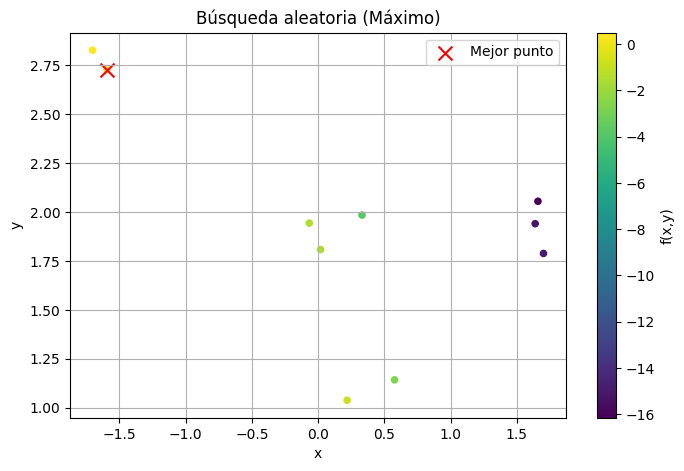

Mejor valor encontrado: f(-1.5941, 2.7271) = 0.4963


,x,y,"f(x,y)"
0,-1.702423,2.826287,0.367395
1,0.577024,1.142682,-2.724685
2,0.218828,1.038731,-0.809436
3,0.018152,1.808179,-1.545787
4,1.701042,1.788353,-14.982107
5,-0.066387,1.943302,-1.517531
6,-1.594071,2.727122,0.496326
7,1.659344,2.054818,-16.152947
8,0.331293,1.984467,-3.819324
9,1.638265,1.940320,-15.188122


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- Widgets ---
dropdown = widgets.Dropdown(
    options=['Máximo', 'Mínimo'],
    value='Máximo',
    description='Buscar:',
)

ecuacion_input = widgets.Text(
    value='y - x - 2*x**2 - 2*x*y - y**2',
    description='Ecuación:',
)

xl_input = widgets.FloatText(
    value=-2,
    description='xl:',
)

xu_input = widgets.FloatText(
    value=2,
    description='xu:',
)

yl_input = widgets.FloatText(
    value=1,
    description='yl:',
)

yu_input = widgets.FloatText(
    value=3,
    description='yu:',
)

n_input = widgets.IntText(
    value=1000,
    description='N muestras:',
)

boton = widgets.Button(
    description='Confirmar',
    button_style='success'
)

# --- Método de búsqueda aleatoria ---
def busqueda_aleatoria(ecuacion, xl, xu, yl, yu, n, modo):
    # Definir función
    def f(x, y):
        return eval(ecuacion)

    # Listas para guardar resultados
    x_lista, y_lista, f_lista = [], [], []

    # Inicializar mejor valor
    best_val = -1e9 if modo == "Máximo" else 1e9
    best_x, best_y = None, None

    # Generar muestras aleatorias
    for i in range(n):
        x = xl + (xu - xl) * np.random.rand()
        y = yl + (yu - yl) * np.random.rand()
        val = f(x, y)

        x_lista.append(x)
        y_lista.append(y)
        f_lista.append(val)

        if modo == "Máximo":
            if val > best_val:
                best_val, best_x, best_y = val, x, y
        else:
            if val < best_val:
                best_val, best_x, best_y = val, x, y

    # --- Crear DataFrame ---
    df = pd.DataFrame({
        "x": x_lista,
        "y": y_lista,
        "f(x,y)": f_lista
    })

    # --- Graficar resultados ---
    plt.figure(figsize=(8,5))
    scatter = plt.scatter(x_lista, y_lista, c=f_lista, cmap="viridis", s=20)
    plt.colorbar(scatter, label="f(x,y)")
    plt.scatter(best_x, best_y, color="red", marker="x", s=100, label="Mejor punto")
    plt.title(f"Búsqueda aleatoria ({modo})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Mejor valor encontrado: f({best_x:.4f}, {best_y:.4f}) = {best_val:.4f}")
    return df

# --- Acción al presionar el botón ---
def on_button_click(b):
    clear_output()
    display(dropdown, ecuacion_input, xl_input, xu_input, yl_input, yu_input, n_input, boton)
    ecuacion = ecuacion_input.value
    xl = xl_input.value
    xu = xu_input.value
    yl = yl_input.value
    yu = yu_input.value
    n = n_input.value
    modo = dropdown.value
    print(f"Ejecutando búsqueda de {modo} para f(x,y) = {ecuacion}")
    df = busqueda_aleatoria(ecuacion, xl, xu, yl, yu, n, modo)
    display(df.head(10))  # Mostrar primeras filas

boton.on_click(on_button_click)

# --- Mostrar interfaz ---
display(dropdown, ecuacion_input, xl_input, xu_input, yl_input, yu_input, n_input, boton)
